In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = load_breast_cancer()

x = df.data
y = df.target

print(df.feature_names)
print(df.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [52]:
df = pd.read_csv("C:\\Users\\PRIYANKA P\\Downloads\\Breast cancer dataset.csv")

In [54]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [58]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [60]:
df.shape

(569, 33)

In [62]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [64]:
df.duplicated().sum()

0

In [ ]:
###Explain that scaling is needed because certain algorithms (like SVM and k-NN)
###Are sensitive to the magnitude of the data,and without scaling,
###Features with larger ranges might dominate the distance-based calculations.

In [75]:
Diagnosis_count = df["diagnosis"]. value_counts()
Diagnosis_count.reset_index()

,diagnosis,count
0,B,357
1,M,212


In [79]:
for column in df.select_dtypes(include="object").columns:
    print(f"{df[column].value_counts()}\n")

diagnosis
B    357
M    212
Name: count, dtype: int64



In [97]:
print("Total no.of diagnosis are", str(df.shape[0]), "/", df.diagnosis.value_counts()["B"], "Benign and Malignent are", 
                                       df.diagnosis.value_counts()["M"])

Total no.of diagnosis are 569 / 357 Benign and Malignent are 212


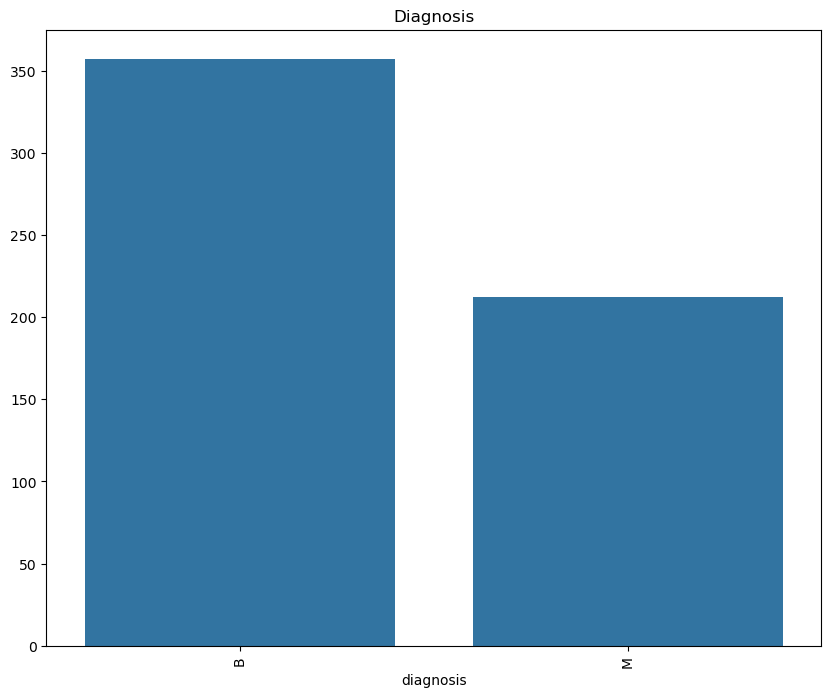

In [99]:
plt.figure(figsize = (10,8))
sns.barplot(x=Diagnosis_count.index, y=Diagnosis_count.values)
plt.title("Diagnosis")
plt.xticks(rotation=90)
plt.show()

In [119]:
x = df.drop(columns = "diagnosis")
y = df["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(455, 32) (455,) (114, 32) (114,)


In [107]:
standscale = StandardScaler()
x = standscale.fit_transform(x)

In [109]:
label = LabelEncoder()
y = label.fit_transform(y)

In [127]:
imputer = SimpleImputer(strategy = "mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

log_reg = LogisticRegression(max_iter =10000)
log_reg.fit(x_train_imputed, y_train)

LogisticRegression(max_iter=10000)

In [129]:
dec_tree_cls = DecisionTreeClassifier()
dec_tree_cls.fit(x_train_imputed, y_train)

DecisionTreeClassifier()

In [131]:
SVM = SVC()
SVM.fit(x_train_imputed, y_train)

SVC()

In [133]:
ran_for_cls = RandomForestClassifier()
ran_for_cls.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [135]:
K_neg_cls = KNeighborsClassifier()
K_neg_cls.fit(x_train_imputed, y_train)

KNeighborsClassifier()

In [145]:
log_reg_y_pred = log_reg.predict(x_test_imputed)
dec_tree_cls_y_pred = dec_tree_cls.predict(x_test_imputed)
SVM_y_pred = SVM.predict(x_test_imputed)
ran_for_cls_y_pred = ran_for_cls.predict(x_test_imputed)
K_neg_cls_y_pred = K_neg_cls.predict(x_test_imputed)



In [165]:
log_reg_y_matx = confusion_matrix(y_test, log_reg_y_pred)
dec_tree_cls_y_matx = confusion_matrix(y_test, dec_tree_cls_y_pred)
SVM_y_matx = confusion_matrix(y_test, SVM_y_pred)
ran_for_cls_y_matx = confusion_matrix(y_test, ran_for_cls_y_pred) 
K_neg_cls_y_matx = confusion_matrix(y_test, K_neg_cls_y_pred)



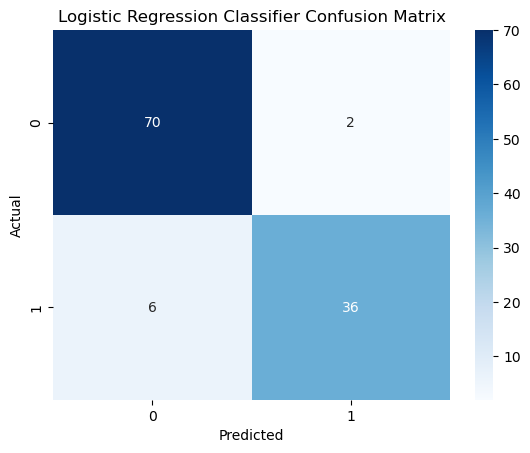

In [171]:
sns.heatmap(log_reg_y_matx, annot=True,fmt="d", cmap= "Blues")

plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [175]:
report = classification_report(y_test,log_reg_y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.92      0.97      0.95        72
   Malignant       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



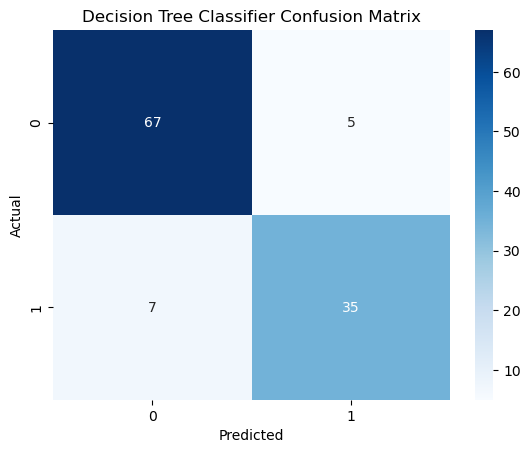

In [173]:
sns.heatmap(dec_tree_cls_y_matx, annot=True,fmt="d", cmap= "Blues")

plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [177]:
report = classification_report(y_test, dec_tree_cls_y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.91      0.93      0.92        72
   Malignant       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



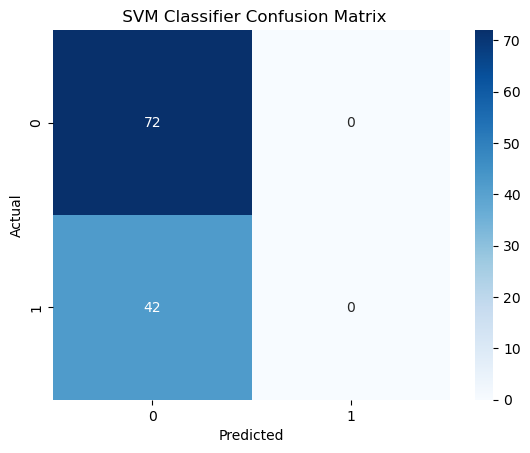

In [163]:
sns.heatmap(SVM_y_matx, annot=True,fmt="d", cmap= "Blues")

plt.title(" SVM Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [167]:
report = classification_report(y_test, SVM_y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.63      1.00      0.77        72
   Malignant       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



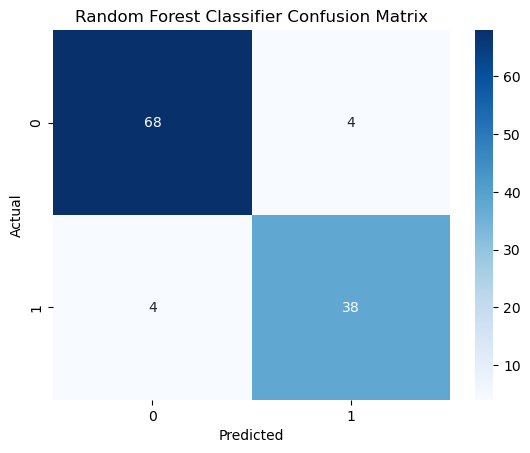

In [183]:
sns.heatmap(ran_for_cls_y_matx, annot=True,fmt="d", cmap= "Blues")

plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [181]:
report = classification_report(y_test, ran_for_cls_y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        72
   Malignant       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



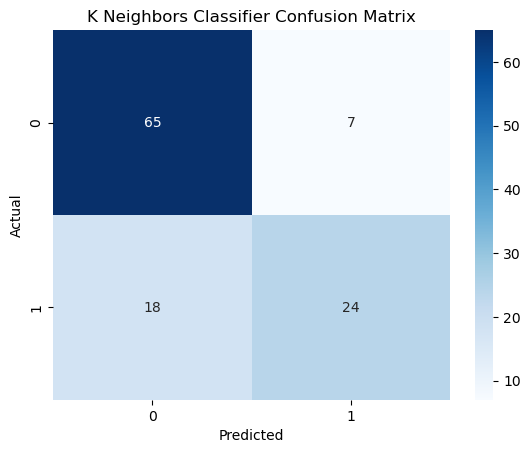

In [185]:
sns.heatmap(K_neg_cls_y_matx, annot=True,fmt="d", cmap= "Blues")

plt.title("K Neighbors Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [187]:
report = classification_report(y_test, K_neg_cls_y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.78      0.90      0.84        72
   Malignant       0.77      0.57      0.66        42

    accuracy                           0.78       114
   macro avg       0.78      0.74      0.75       114
weighted avg       0.78      0.78      0.77       114



In [ ]:
#Best Performing Model: In the example, the Random Forest Classifier has the highest accuracy (0.92) and balanced precision and recall, suggesting it performs the best overall.
#Random Forest likely performed the best due to its ensemble nature, which combines multiple decision trees and reduces overfitting.
#Worst Performing Model: Based on the  accuracy, the SVM classifier seem to have slightly lower performance compared to the others.
#SVM classifier could be considered the worst based on slightly lower accuracy 